<h1><LEFT> DEPARTAMENTO DE ENGENHARIA ELÉTRICA - UFMG</LEFT></h1>

### Engenharia de Sistemas

    Disciplina: Computação Evolucionária
    Professor:  Cristiano Leite de Castro

### Trabalho Prático 1: O problema das N-Rainhas 
    Aluno: Antonio Carlos da Anunciação - 2018019443
    Aluno: Izabela Costa Brant          - 2016026353       
    14/06/2021 - Belo Horizonte - MG

---

### 1. INTRODUÇÃO:

Dado um tabuleiro de xadrez regular de dimensões NxN com N ≥ 4, posicionar N rainhas no tabuleiro de forma que elas não se coloquem em xeque. O NQueens é um problema de natureza combinátória e de complexidade exponencial, de modo que a quantidade total de maneiras de se dispor as peças no tabuleiro é C(N², N), ou seja, combinação de N² tomado N a N, de modo que para N = 8 temos aproximadamente 4.3x10^9 possiveis configurações, e se N = 9 teremos 2.6x10^11.

---

### 2. METODOLOGIA DE SOLUÇÃO:

Utilizando a abordagem de Computação Evolucionária foi implementado um código baseado na ideia da Seleção Natural de **Charles Darwin**, que foi originalmente proposta por **John Holland**, em sua livro **Adaptation in Natural and Artificial Systens** de 1975. De modo que os indivíduos mais adaptáveis serão os mais susceptíveis a sobreviver.

#### Conversões utilizadas:
    
    - o fenótipo é um vetor de 0 a N-1, onde cada coluna é a posição da peça na linha;
    - os indivíduos mais susceptíveis a sobreviver são os que possuem a menor quantidade de xeques (qualidade);
    - a probabilidade da mutação ocorrer é de 80%;
    - a probabilidade do crossover acontecer é de 100%;
    - a seleção é baseada em torneio, **Eiben e Smith, 2003; Mitchell, 1996**;
    - o crossover é realizado em todos individuos selecionados no torneio, gerando assim novos filhos;
    - a condição de parada é baseada na quantidade de gereção ou qualidade média de uma população;
    - a população é uma matriz pxN, onde cada linha p_i é um indivíduo.
 ---

### 3. ALGORITMO:

De forma geral nos algoritmo funciona da seguinte forma:
   
    INICIO
        INICIALIZAÇÃO aleatório de uma população
        AVALIAÇÃO da qualidade dessa população
        ENQUANTO {criterio não é atendidO}:
            - SELEÇÃO melhores individuos
            - CRUZAMENTO entre melhores individuos, gerando novos individuos
            - MUTAÇÃO dos novos indivisuos
            - AVALIAÇÃOo da nova população
            - SELEÇÃO da nova geração
    FIM

---

### 4. IMPLEMENTAÇÃO:

**Escolha dos hiperparametros:**
    
- *Crossover rate*, probabilidade com que acontece o cruzamento genético.
- *Mutation rate*, probabilidade com que acontece a mutação genética.

In [1]:
crossover_rate = 1
mutation_rate = 0.8 

### Implementação das funções:

- **init_population(k, n):**\
Inicializa uma população de tamanho k com individuos de tamanho n.

    A qualidade das nossas soluções e velocidade de convergencia começa aqui, como foi dito na introdução este é um problema combinatório de natureza exponencial, então das C(N², N) possiveis individuos, muitos destes individuos são soluções invalidas, e estes individuos podem ser detectados ainda na inicialização da população. Qualquer individuo que tenha uma peça imediatamente adjacente a outra peça é uma solução invalida, então se durante nossa inicialização ja tratarmos nossos individuos de modo que não tenham pelo menos peças na mesma linha ou coluna, já reduz consideravelmente nossa população a ser investigada. Dessa forma o algoritmo de inicialização sempre vai criar individuos na forma A(N², N), ou seja, vai criar arranjos de tamanho N, com numeros de 0 a N-1 sem repetições.

In [2]:
def init_population(_mu:int = 20, n:int = 8):
    population = []
    for i in range (_mu):
        population.append(rd.sample(range(n), n))
    return population

- **fitness_nq(solution):**\
Calcula a quantidade de xeques existentes em uma solução.

    Esta função é nossa função objetivo do problema, ou seja, nossa função que queremos minimizar, em cada individuo ela checa para cada peça se existe outra peça na mesma linha, coluna e diagonais, e contbiliza essa quantidade. Ela returna a quantidade total de xeques existentes na solução, lembrando que ara cada xeque, duas peças estão em xeque. 



- **evaluate(population):**\
Retorna a quantidade média de xeques para uma determinada população.

    Esta função calcula a quantidade de xeques para cada individuo de uma população e nos retorna a quantidade média, é de se esperar que o valor que esta função retorne tenda a convergir para valores melhores a cada geração, indicando que dentro daquela população existem soluções ótimas.

In [3]:
def fitness_nq(solution):
    xeques = 0
    for i in range(0,len(solution)):
        for j in range(0,len(solution)):
            if i!=j:
                if i-solution[i] == j-solution[j] or i+solution[i] == j+solution[j]:
                    xeques+=1
    return xeques/2

def evaluate(pop):
    quality = 0
    for i in range(len(pop)):
        quality += fitness_nq(pop[i])
        
    return quality/len(pop)

- **selection(population, k):**\
Retorna os melhores k individuos de uma população

    Esta função compara aleatoriamente os individuos de uma população e retotna os k melhores, dentro destes k melhores pode haver individuos repetidos, já que a seleção é baseada em torneio, ou seja, aleatoriamente individuos dois a dois são comparados e selecionado o melhor dos dois, k vezes.

In [4]:
def selection(pop, k):
    best_pop = []
    best_fit = []
    for _ in range(k):
        a, b = rd.sample(pop, 2)
        if fitness_nq(a) < fitness_nq(b):
            best = a
        else:
            best = b

        best_pop.append(best)
        best_fit.append(fitness_nq(best))

    return best_pop

- **crossover(population, c):**\
Retorna os filhos gerados pelo cruzamento dos melhores individuos da população total

    Esta função cruza os invididuos selecionado na etapa de Seleção do algoritmo, este cruzamento genético pode ser feito de duas maneiras com a função abaixo:
    * Dividindo os dois pais cada um em duas partes e trocando estas partes entre os pais, um ponto de corte, c = 1, gerando novos individuos que herdam metade da carga genética de cada pai.
    * Dividindo os dois individuos cada um em três partes, c = 2, trocando a parte central entre eles e completando de maneira circular os genes restantes, gerando assim invididuos que carregam até 1/3 da herança genética de cada um dois pais, esta abordagem conforme **Davis (1991)** é mais apropriado para problemas onde a ordem das informações importa.

In [5]:
# Função que aplica o cruzamento genético, pode ser usada com uma faixa de corte, c = 1
# ou duas faixas de cortes, c = 2
def crossover(pop, c):
    
    if c not in [1 ,2]:
        c = 1
    
    pop_array = np.array(pop)
    bag = np.arange(0, pop_array.shape[1]).tolist()
    cros_pop = []

    for k in range(0, len(pop), 2):
        if rd.uniform(0, 1) < crossover_rate:
            c1, c2 = pop_array[k,:], pop_array[k+1,:]
            d1, d2 = np.empty(c1.shape), np.empty(c2.shape)
            d1[:], d2[:] = np.NaN , np.NaN

            cut = rd.sample(bag, c)
            cut1, cut2 = min(cut), max(cut)
            d2[cut1:(cut2+1)] = c1[cut1:(cut2+1)]
            d1[cut1:(cut2+1)] = c2[cut1:(cut2+1)]
            r1 = np.concatenate((c1[(cut2+1):], c1[:cut1]))
            r2 = np.concatenate((c2[(cut2+1):], c2[:cut1]))
            r1, r2 = np.hstack((r1, r2)), np.hstack((r2, r1))

            jc1, jc2 = 0, cut2+1
            for i in range(0,len(r1)):
                if r1[i] not in d1:
                    if jc2 < len(d1):
                        d1[jc2] = r1[i]
                        jc2 +=1

                    else:
                        d1[jc1] = r1[i]
                        jc1 += 1

            jc1, jc2 = 0, cut2+1
            for i in range(0,len(r2)):
                if r2[i] not in d2:
                    if jc2 < len(d2):
                        d2[jc2] = r2[i]
                        jc2 += 1

                    else:
                        d2[jc1] = r2[i]
                        jc1 += 1                

            cros_pop.append(d1.tolist())
            cros_pop.append(d2.tolist())
           
    return cros_pop

- **mutate(population):**\
Aplica a mutação dos genes em cada um dos filhos

    Esta função com base na probabilidade *mutation_rate* aplica a troca aleatória na posição entre dois genes para cada um dos individuos da poplação de filhos.

In [6]:
def mutate(pop):
    mut_pop = []
    for i in range(0,len(pop)):
        _pop = pop[i].copy()
        if rd.uniform(0, 1) < mutation_rate:
            a, b = rd.randint(0, len(pop[i])-1), rd.randint(0, len(pop[i])-1)
            _pop[a], _pop[b] = _pop[b], _pop[a]
            mut_pop.append(_pop)
    return mut_pop

- **display(sol):**\
Gera uma visualização para um determinado individuo da população

In [7]:
# Mostra a disposição das peças no tabuleiro:
def display(sol):
    %matplotlib inline
    
    N_QUEEN = len(sol)
    chess_board = np.zeros((N_QUEEN, N_QUEEN, 3))
    black, white = 0.5, 1

    for l in range(N_QUEEN):
        for c in range(N_QUEEN):
            if (l%2 == c%2):
                col = white
            else:
                col = black
            chess_board[l,c,::]=col

    fig, ax = plt.subplots(figsize=(N_QUEEN/2, N_QUEEN/2))
    ax.imshow(chess_board, interpolation='none')
    wq_im_file = "https://github.com/antonioanunciacao/Computacao_Evolucionaria/blob/main/imagens/BQueen.png?raw=true"
    bq_im_file = "https://github.com/antonioanunciacao/Computacao_Evolucionaria/blob/main/imagens/BQueen.png?raw=true"
    #wq_im_file = "./imagens/WQueen.png"
    #bq_im_file = "./imagens/BQueen.png"
    wq = plt.imread(wq_im_file)
    bq = plt.imread(bq_im_file)
    for x, y in enumerate(sol):
        if (x%2 == y%2):
            queen = bq
        else:
            queen = wq 
        ax.imshow(queen, extent=[x - 0.4, x + 0.4, 
                                 ((N_QUEEN-1)-y) - 0.4, ((N_QUEEN-1)-y) + 0.4]) #...queen, extent=[(left, right, bottom, top)]
    ax.set(xticks=[], yticks=[])
    ax.axis('image')
    plt.show()

- **netural_selection(pop_size, individual_size, cu_quantify):**\
É a função principal do trabalho, ela é a aplicação direta do algoritmo apresentado no item 3, ela tem dois critério de paradas, por quantidade de geração, ou se o valor medio da qualidade indica que existe soluções perfeitas dentro dessa população.

In [34]:
def natural_selection(pop_size, individual_size, cut_quantify, qGen):
    pop = init_population(pop_size, individual_size)
    best_pop = pop.copy()
    quality_primaria = evaluate(pop)
    solutions = []
    print("Qualidade Geracao Primária:", quality_primaria)
    gen = 0
    while gen < qGen:
        pop = selection(pop, pop_size)
        filhos = crossover(pop, cut_quantify)
        filhos = mutate(filhos)
        pop = pop + filhos
        quality = evaluate(pop)
        
        best_fit = []
        for i in range(len(pop)):
            best_fit.append(fitness_nq(pop[i]))
        
        index = best_fit.index(min(best_fit))
        display(pop[index])
        
        if (quality_primaria > quality):
            best_pop = pop.copy()
            quality_primaria= quality
            print("Atual melhor solução: {0:.3f}".format(quality))
            if quality < 1:
                print("\nPopulação com melhor solução encontrada.\nGeração:", gen)
                break
        gen += 1
        solutions.append(pop)
    best_pop_F = selection(best_pop, pop_size)
    return best_pop_F, solutions

---

In [35]:
import matplotlib.pyplot as plt
import random as rd
import numpy as np

### 5. RESULTADOS:

### Experimento 1:

* N = 8
* População = 20
* Quantidade de Gerações Maxima = 1000
* Quantidade de cortes no crossover = 2

Qualidade Geracao Primária: 4.85


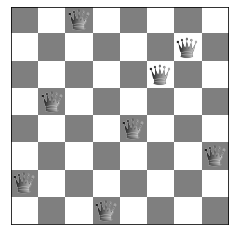

Atual melhor solução: 4.833


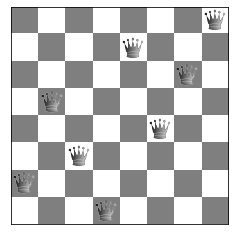

Atual melhor solução: 3.892


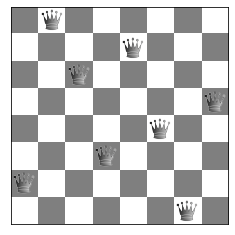

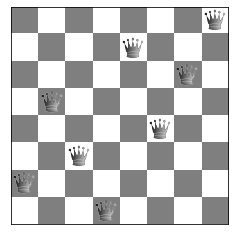

Atual melhor solução: 3.324


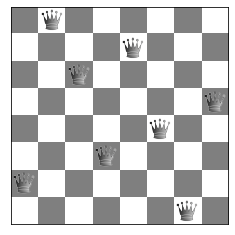

Atual melhor solução: 3.211


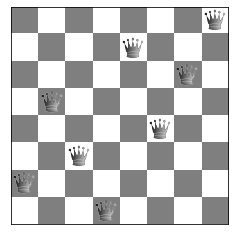

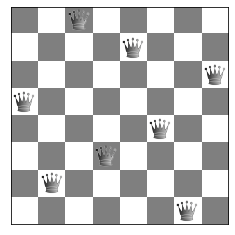

Atual melhor solução: 2.971


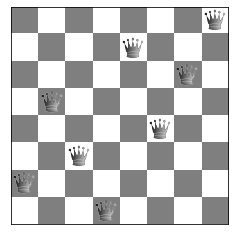

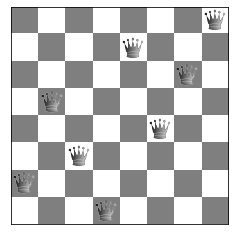

Atual melhor solução: 2.306


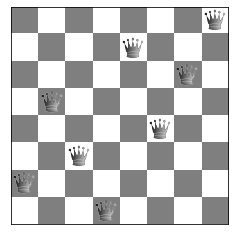

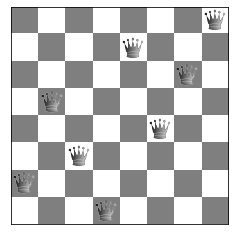

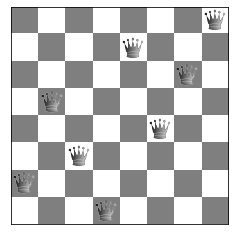

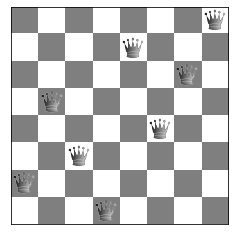

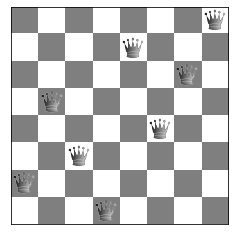

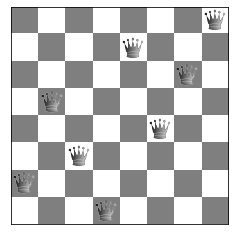

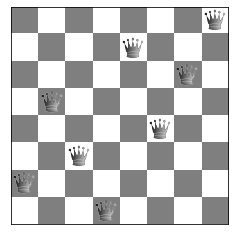

Atual melhor solução: 2.250


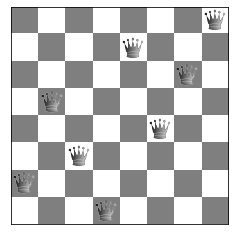

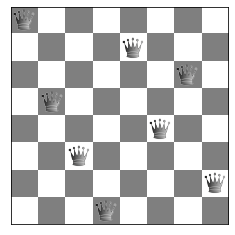

Atual melhor solução: 2.061


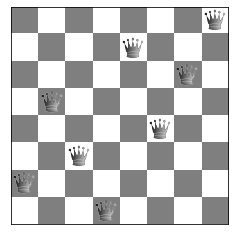

Atual melhor solução: 1.824


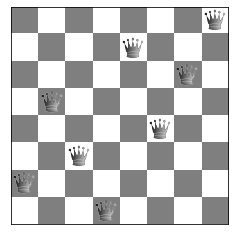

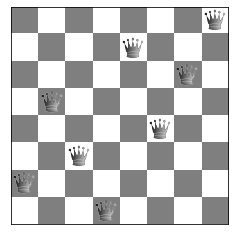

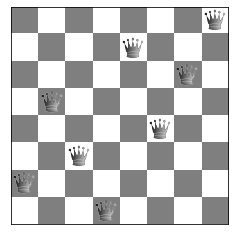

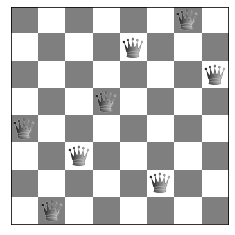

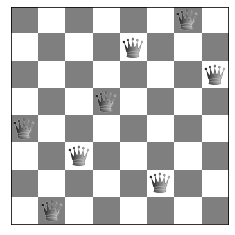

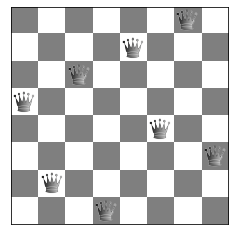

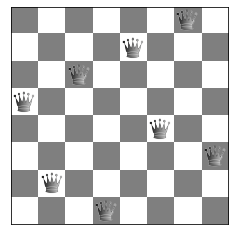

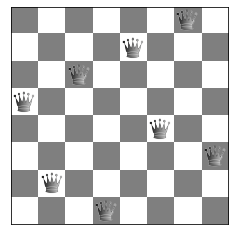

Atual melhor solução: 1.743


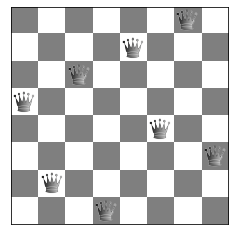

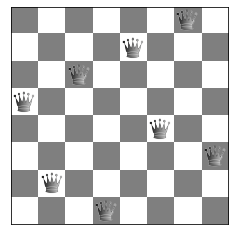

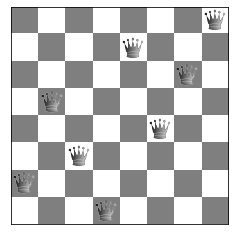

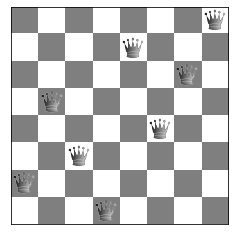

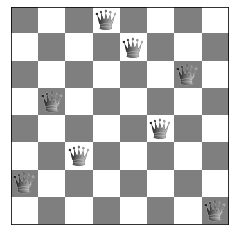

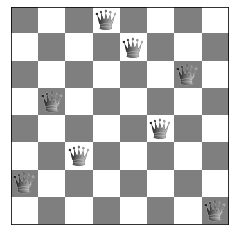

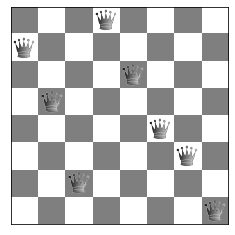

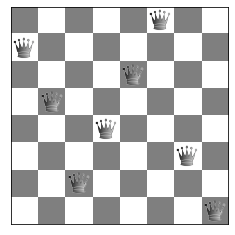

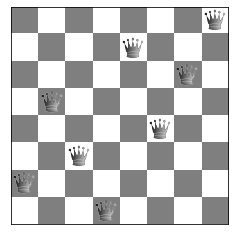

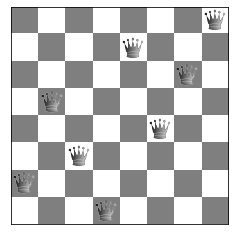

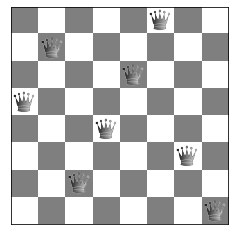

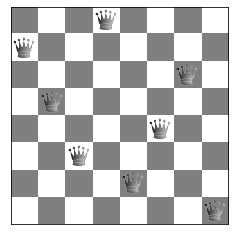

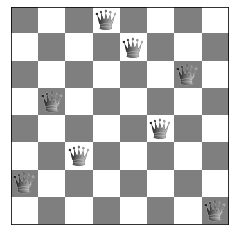

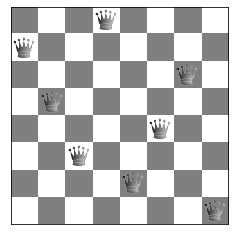

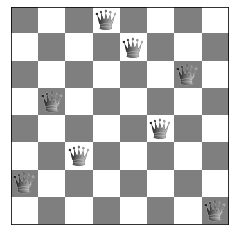

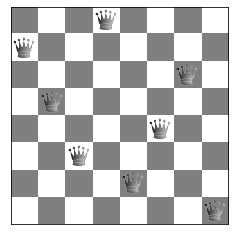

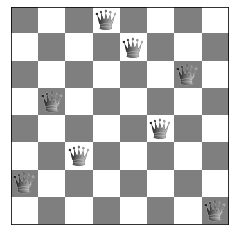

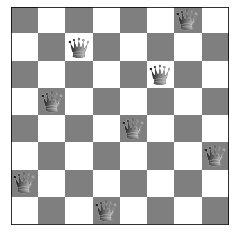

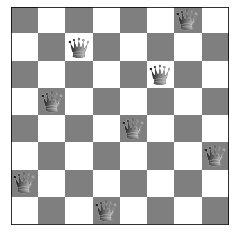

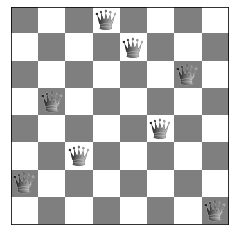

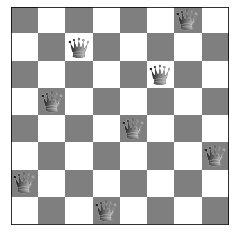

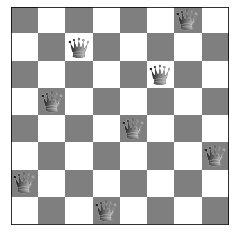

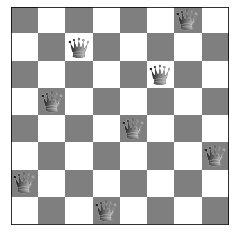

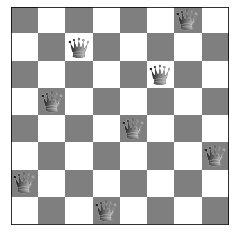

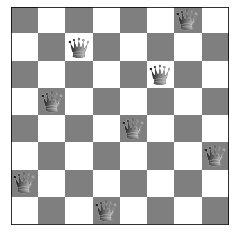

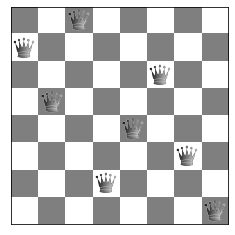

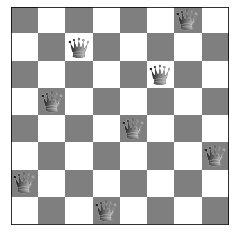

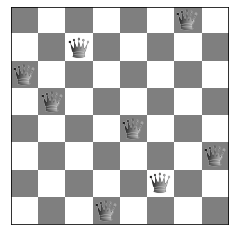

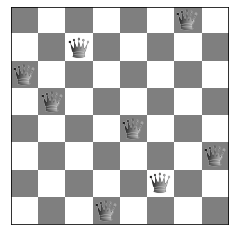

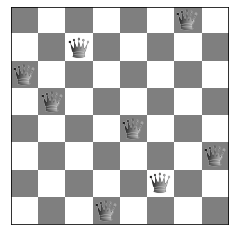

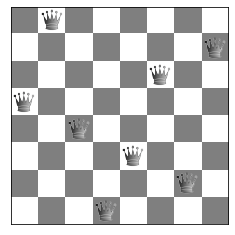

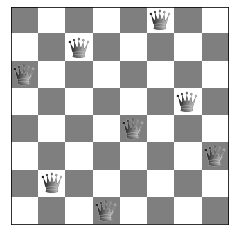

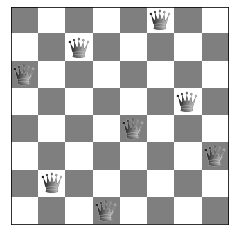

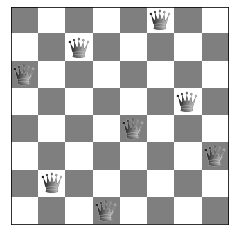

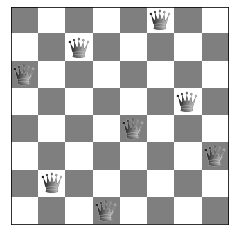

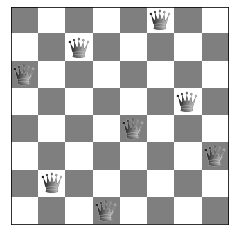

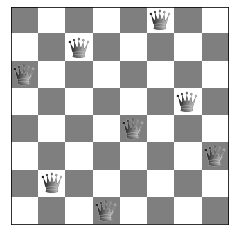

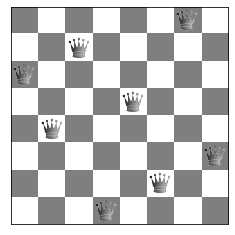

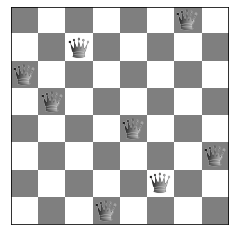

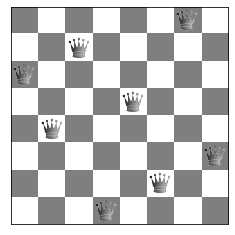

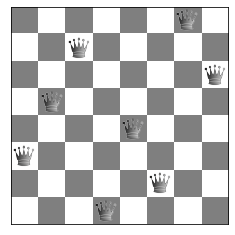

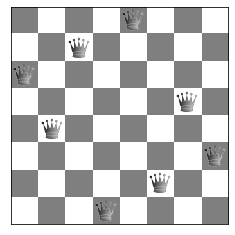

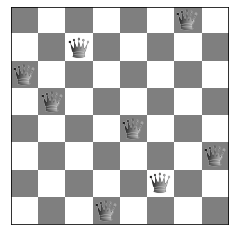

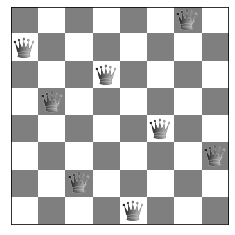

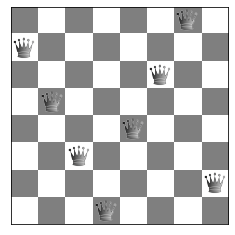

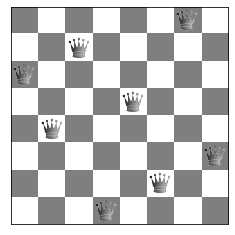

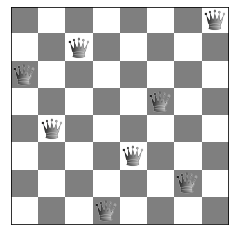

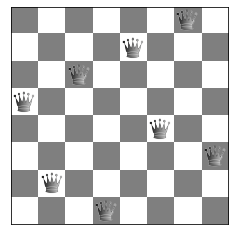

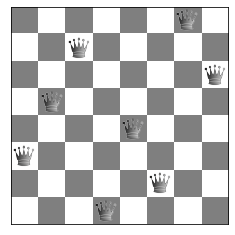

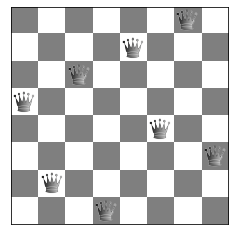

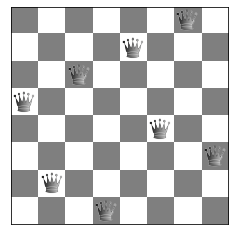

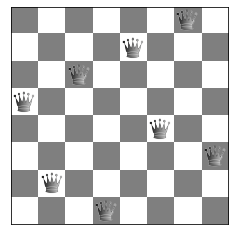

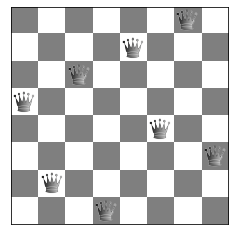

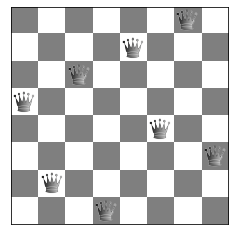

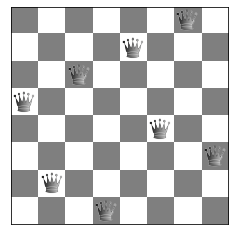

Atual melhor solução: 1.676


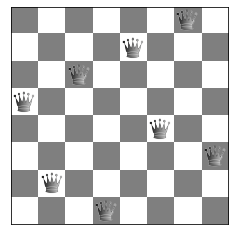

Atual melhor solução: 1.441


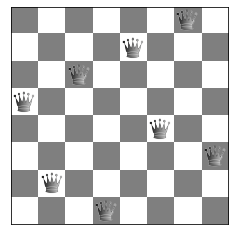

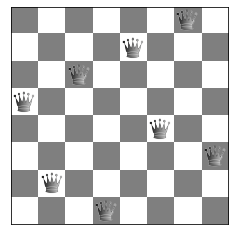

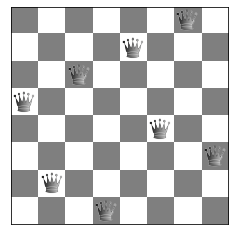

Atual melhor solução: 1.400


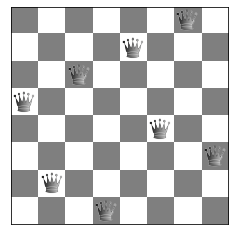

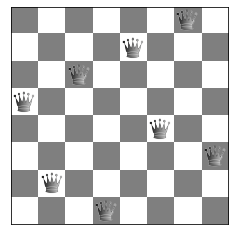

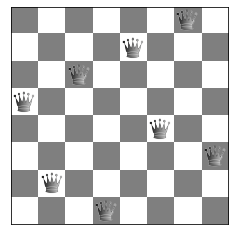

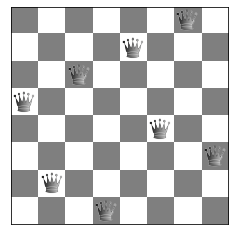

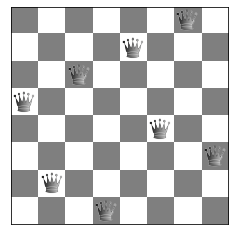

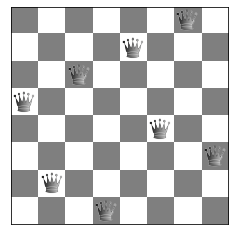

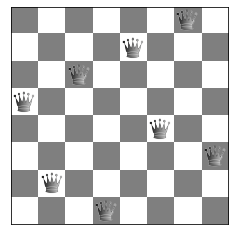

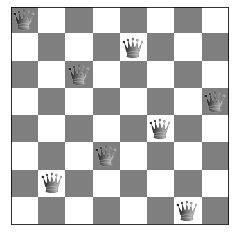

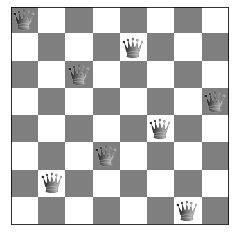

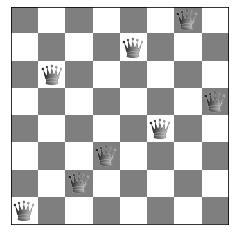

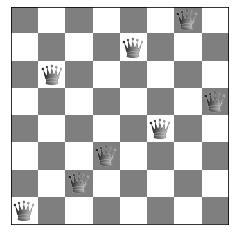

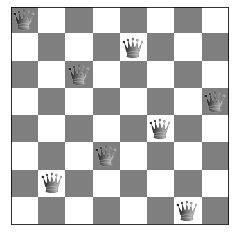

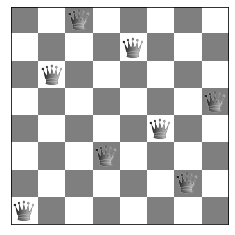

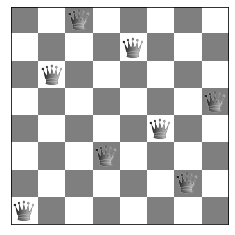

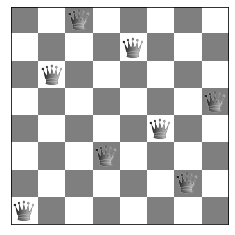

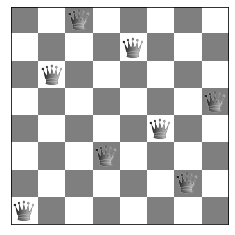

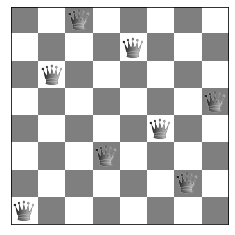

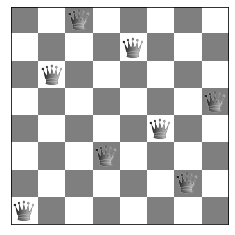

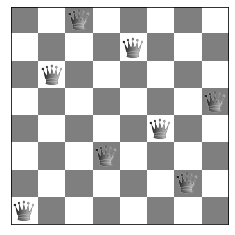

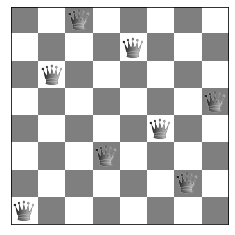

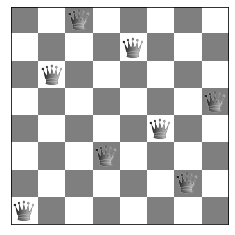

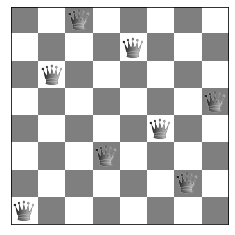

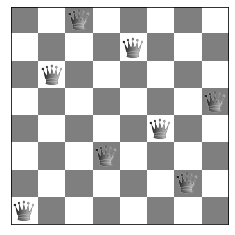

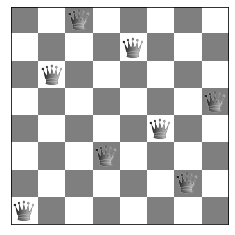

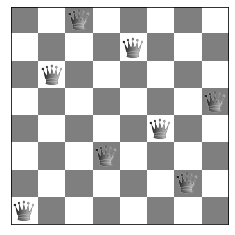

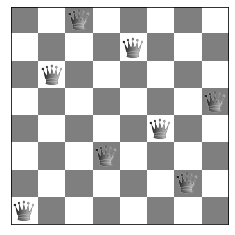

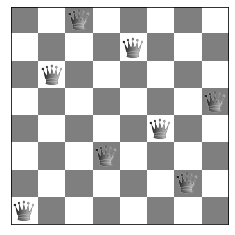

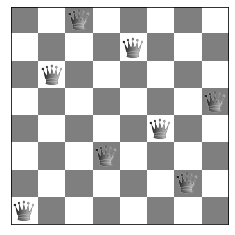

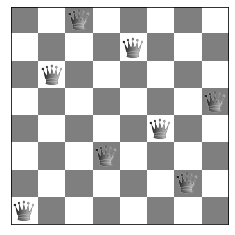

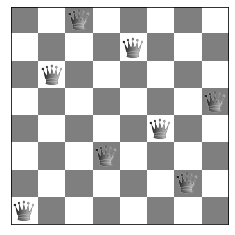

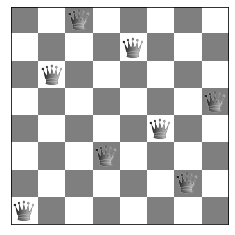

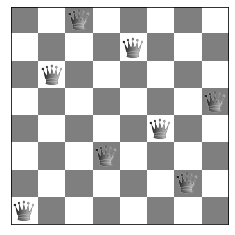

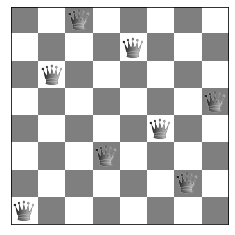

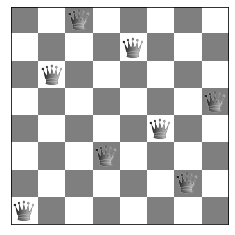

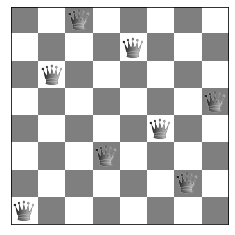

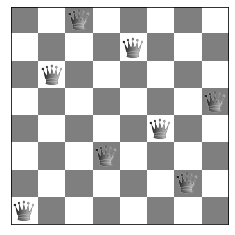

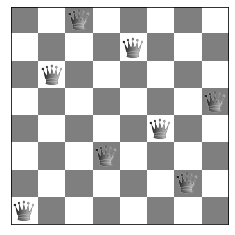

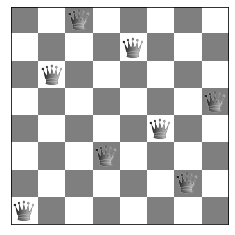

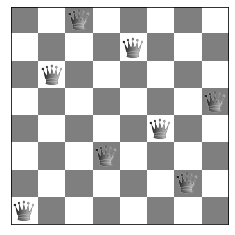

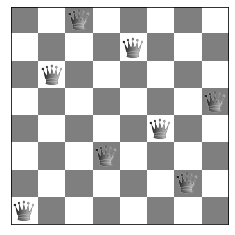

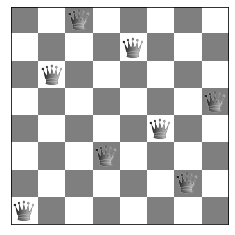

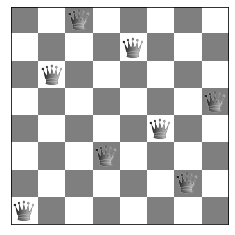

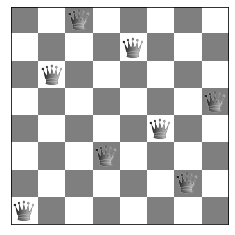

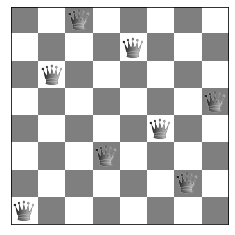

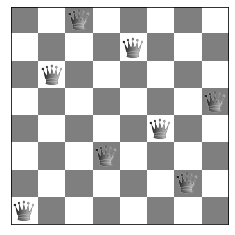

In [ ]:
solution_8, solutions_8 = natural_selection(20,8,2,10**3)

In [21]:
index

0

#### Amostra das soluções da melhor população e a quantidade de xeques:

In [19]:
best_fit_8 = []
for i in range(len(solution_8)):
    best_fit_8.append(fitness_nq(solution_8[i]))
    print(solution_8[i], best_fit_8[i])

[3.0, 1.0, 6.0, 2.0, 5.0, 7.0, 0.0, 4.0] 0.0
[3.0, 1.0, 6.0, 2.0, 5.0, 7.0, 0.0, 4.0] 0.0
[3.0, 1.0, 6.0, 2.0, 5.0, 7.0, 0.0, 4.0] 0.0
[3.0, 1.0, 6.0, 2.0, 5.0, 7.0, 0.0, 4.0] 0.0
[3.0, 1.0, 6.0, 2.0, 5.0, 7.0, 0.0, 4.0] 0.0
[3.0, 1.0, 6.0, 2.0, 5.0, 7.0, 0.0, 4.0] 0.0
[3.0, 1.0, 6.0, 2.0, 5.0, 7.0, 0.0, 4.0] 0.0
[3.0, 1.0, 6.0, 2.0, 5.0, 7.0, 0.0, 4.0] 0.0
[3.0, 1.0, 6.0, 2.0, 5.0, 7.0, 0.0, 4.0] 0.0
[3.0, 1.0, 6.0, 2.0, 5.0, 7.0, 0.0, 4.0] 0.0
[3.0, 1.0, 6.0, 2.0, 5.0, 7.0, 0.0, 4.0] 0.0
[3.0, 1.0, 6.0, 2.0, 5.0, 7.0, 0.0, 4.0] 0.0
[3.0, 1.0, 6.0, 2.0, 5.0, 7.0, 0.0, 4.0] 0.0
[3.0, 1.0, 6.0, 2.0, 5.0, 7.0, 0.0, 4.0] 0.0
[3.0, 1.0, 6.0, 2.0, 5.0, 7.0, 0.0, 4.0] 0.0
[3.0, 1.0, 6.0, 2.0, 5.0, 7.0, 0.0, 4.0] 0.0
[3.0, 1.0, 6.0, 0.0, 5.0, 7.0, 2.0, 4.0] 3.0
[4.0, 1.0, 6.0, 2.0, 5.0, 7.0, 0.0, 3.0] 1.0
[3.0, 1.0, 6.0, 2.0, 5.0, 7.0, 0.0, 4.0] 0.0
[3.0, 1.0, 6.0, 2.0, 5.0, 7.0, 0.0, 4.0] 0.0


#### Convergencia em função das gerações:

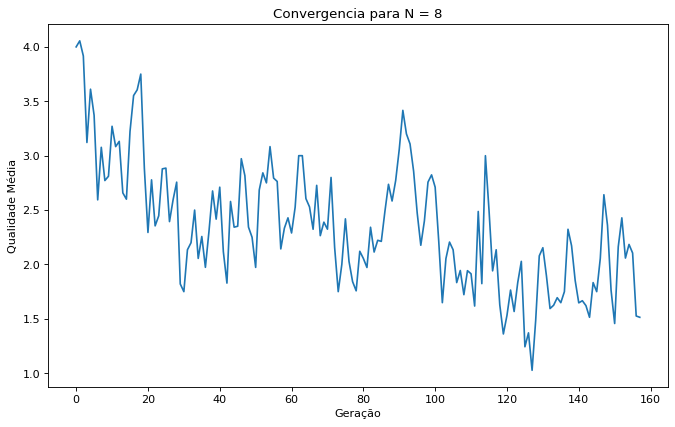

In [65]:
quality_solutions_8 = []
for i in range(0,len(solutions_8)):
    quality_solutions_8.append(evaluate(solutions_8[i]))

plt.figure(figsize=(10, 6), dpi=80)
plt.title('Convergencia para N = 8')
plt.xlabel('Geração')
plt.ylabel('Qualidade Média')
plt.plot(quality_solutions_8)
plt.show()

#### Visualização das soluções:

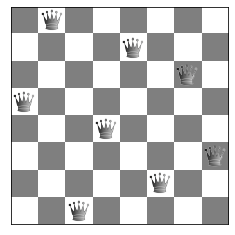

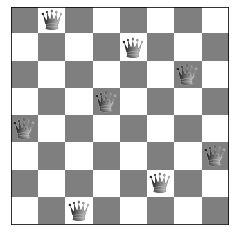

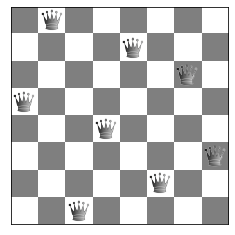

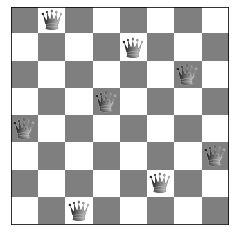

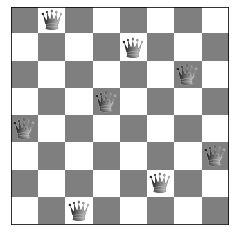

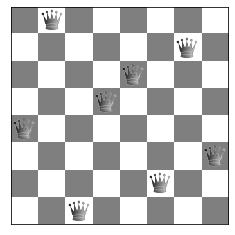

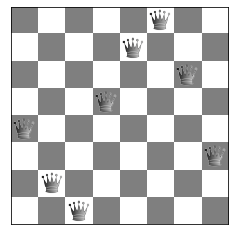

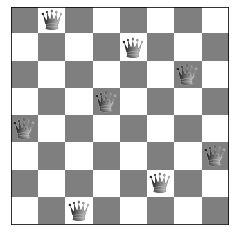

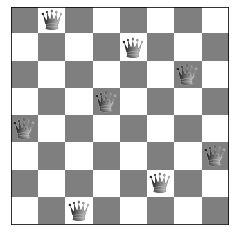

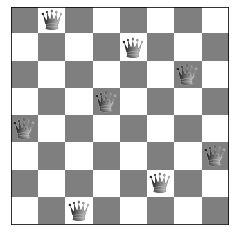

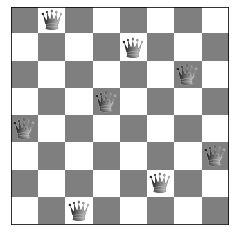

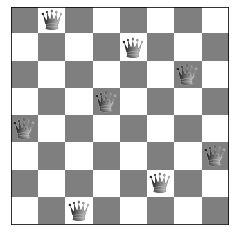

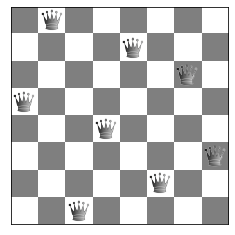

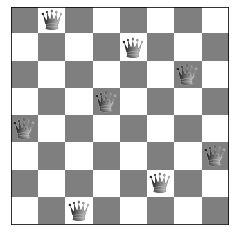

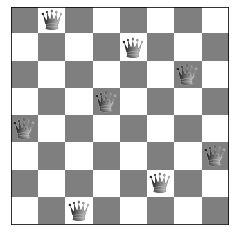

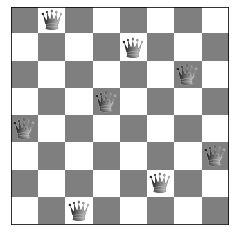

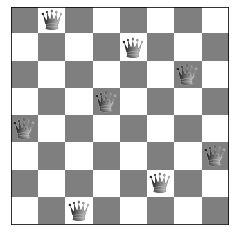

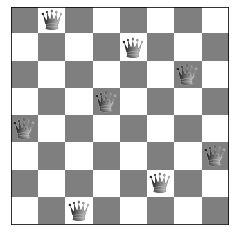

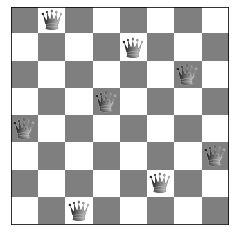

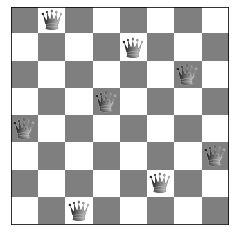

In [83]:
for i in range(len(solution_8)):
    display(solution_8[i])

É interessante notar que este problema, para N = 8, possue 12 soluções basicas possiveis, cada uma das 12 pode ser feito operações que geram outras 8, totalizando assim 92 soluções para o problema N-Queens tradicional.

### Experimento 2:

* N = 20
* População = 20
* Quantidade de Gerações Maxima = 1000
* Quantidade de cortes no crossover = 2

In [70]:
solution_20, solutions_20 = natural_selection(20,20,2,10**3)

Qualidade Geracao Primária: 11.1
Atual melhor solução: 9.543
Atual melhor solução: 9.206
Atual melhor solução: 8.086
Atual melhor solução: 7.667
Atual melhor solução: 7.429
Atual melhor solução: 7.389
Atual melhor solução: 7.000
Atual melhor solução: 6.583
Atual melhor solução: 6.057
Atual melhor solução: 5.778
Atual melhor solução: 5.389
Atual melhor solução: 4.686
Atual melhor solução: 4.294
Atual melhor solução: 4.167
Atual melhor solução: 3.912
Atual melhor solução: 3.556
Atual melhor solução: 3.474
Atual melhor solução: 2.886
Atual melhor solução: 2.818
Atual melhor solução: 2.806
Atual melhor solução: 2.639
Atual melhor solução: 2.364
Atual melhor solução: 2.324
Atual melhor solução: 1.703
Atual melhor solução: 1.286
Atual melhor solução: 1.263
Atual melhor solução: 1.222


#### Amostra das soluções da melhor população e a quantidade de xeques:

In [80]:
best_fit_20 = []
for i in range(len(solution_20)):
    best_fit_20.append(fitness_nq(solution_20[i]))
    print(solution_20[i], best_fit_20[i])

[16.0, 1.0, 10.0, 0.0, 13.0, 9.0, 12.0, 6.0, 19.0, 2.0, 15.0, 18.0, 3.0, 8.0, 17.0, 7.0, 4.0, 11.0, 14.0, 5.0] 0.0
[16.0, 1.0, 10.0, 0.0, 13.0, 9.0, 12.0, 6.0, 19.0, 2.0, 15.0, 18.0, 3.0, 8.0, 17.0, 7.0, 4.0, 11.0, 14.0, 5.0] 0.0
[16.0, 1.0, 10.0, 0.0, 13.0, 9.0, 12.0, 6.0, 19.0, 2.0, 15.0, 18.0, 3.0, 8.0, 17.0, 7.0, 5.0, 11.0, 14.0, 4.0] 1.0
[16.0, 1.0, 10.0, 0.0, 13.0, 9.0, 12.0, 6.0, 19.0, 2.0, 15.0, 18.0, 3.0, 8.0, 17.0, 7.0, 4.0, 11.0, 14.0, 5.0] 0.0
[16.0, 0.0, 10.0, 1.0, 13.0, 9.0, 12.0, 6.0, 19.0, 2.0, 15.0, 18.0, 3.0, 8.0, 17.0, 7.0, 4.0, 11.0, 14.0, 5.0] 1.0
[16.0, 1.0, 10.0, 0.0, 13.0, 9.0, 12.0, 6.0, 19.0, 2.0, 15.0, 18.0, 3.0, 8.0, 17.0, 7.0, 4.0, 11.0, 14.0, 5.0] 0.0
[16.0, 1.0, 10.0, 0.0, 13.0, 9.0, 12.0, 6.0, 19.0, 14.0, 15.0, 18.0, 3.0, 8.0, 17.0, 7.0, 4.0, 11.0, 2.0, 5.0] 2.0
[16.0, 1.0, 10.0, 0.0, 13.0, 9.0, 12.0, 6.0, 19.0, 2.0, 15.0, 18.0, 3.0, 8.0, 17.0, 7.0, 4.0, 11.0, 14.0, 5.0] 0.0
[16.0, 1.0, 10.0, 0.0, 13.0, 9.0, 12.0, 6.0, 19.0, 2.0, 15.0, 18.0, 3.0, 8.0, 17

#### Convergencia em função das gerações:

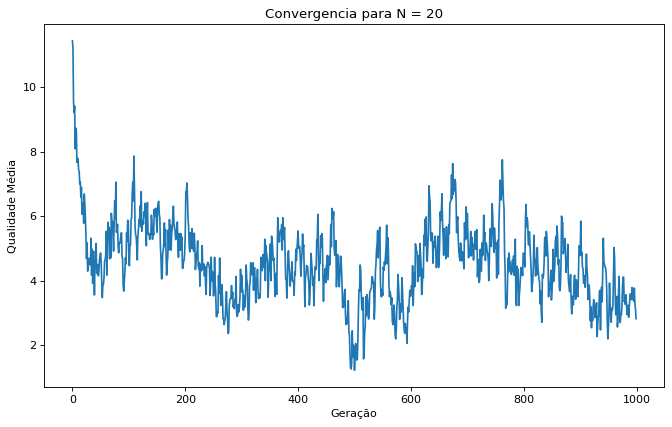

In [72]:
quality_solutions_20 = []
for i in range(0,len(solutions_20)):
    quality_solutions_20.append(evaluate(solutions_20[i]))

plt.figure(figsize=(10, 6), dpi=80)
plt.title('Convergencia para N = 20')
plt.xlabel('Geração')
plt.ylabel('Qualidade Média')
plt.plot(quality_solutions_20)
plt.show()

#### Visualização das soluções:

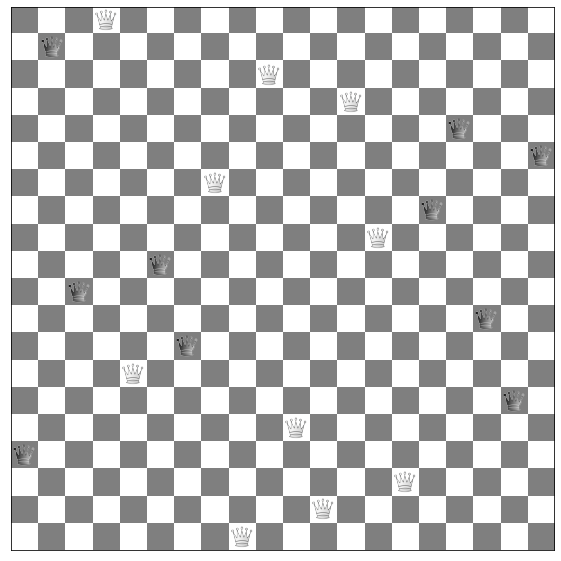

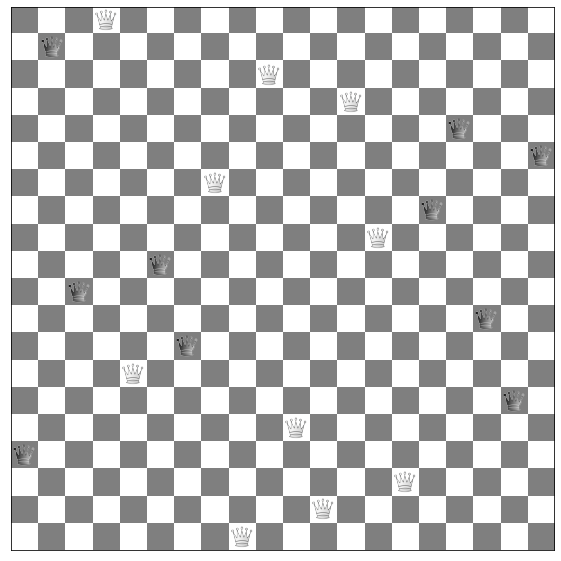

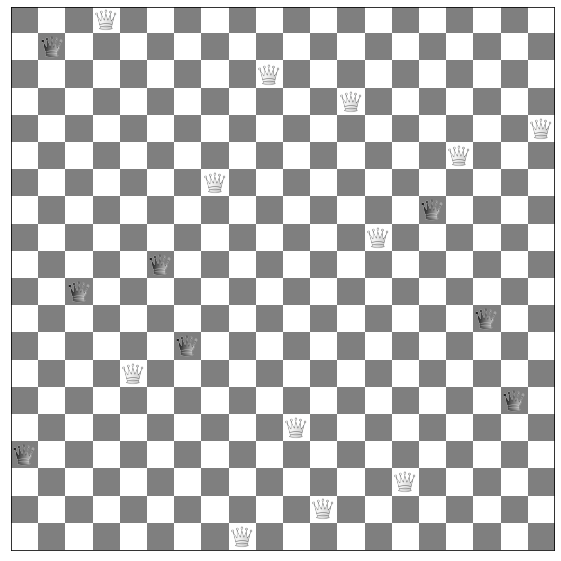

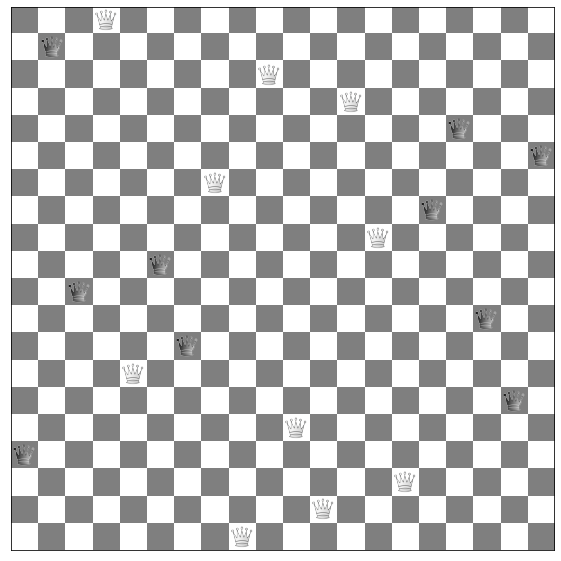

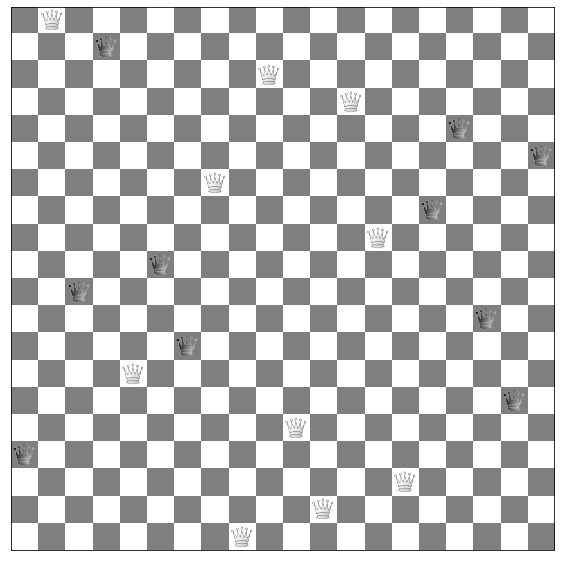

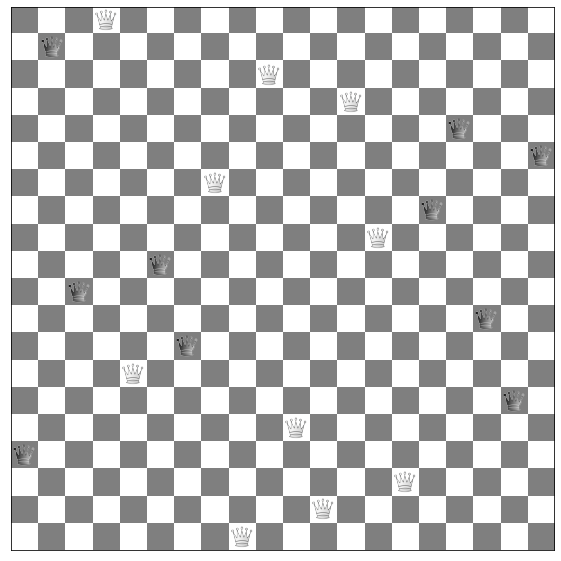

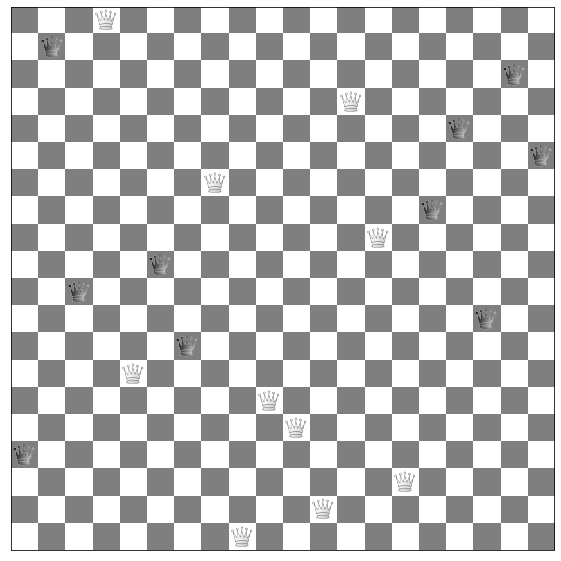

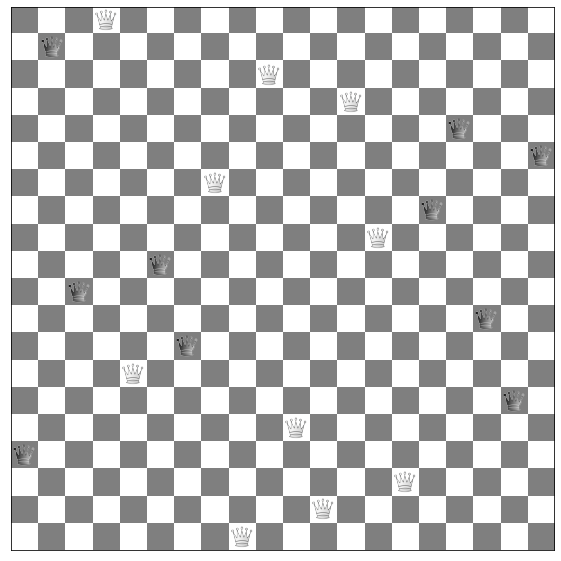

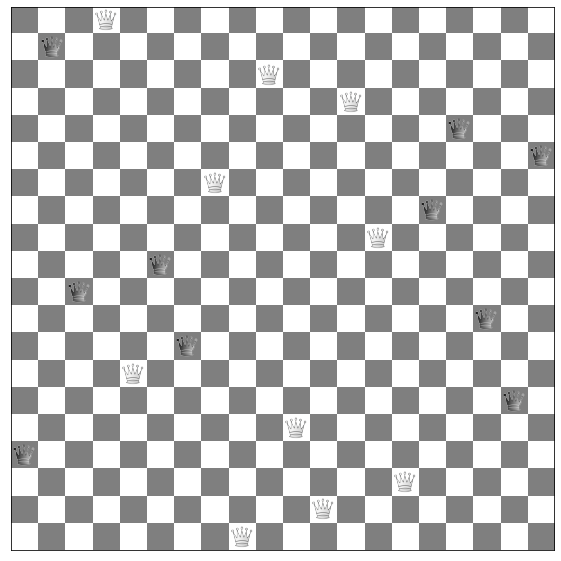

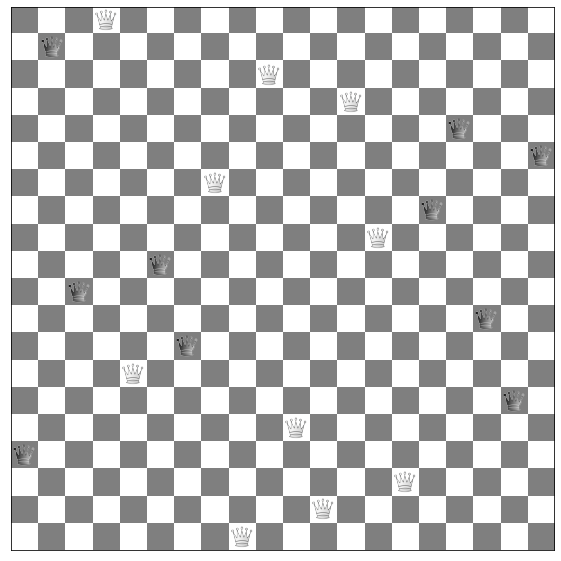

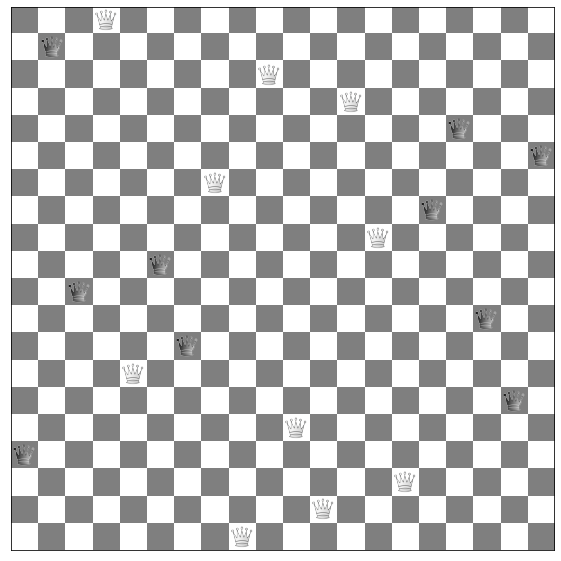

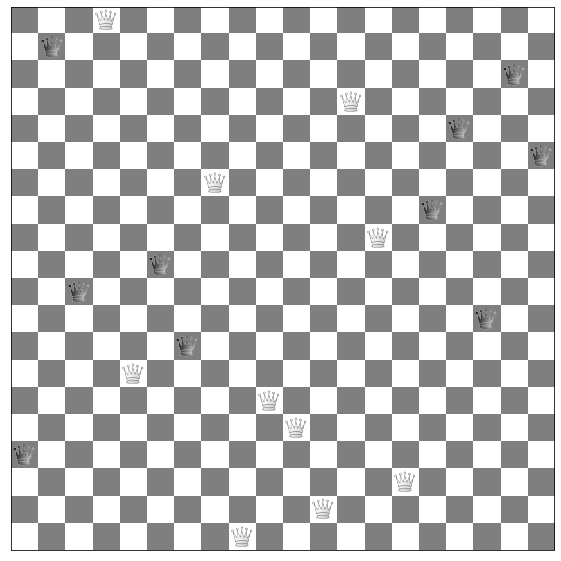

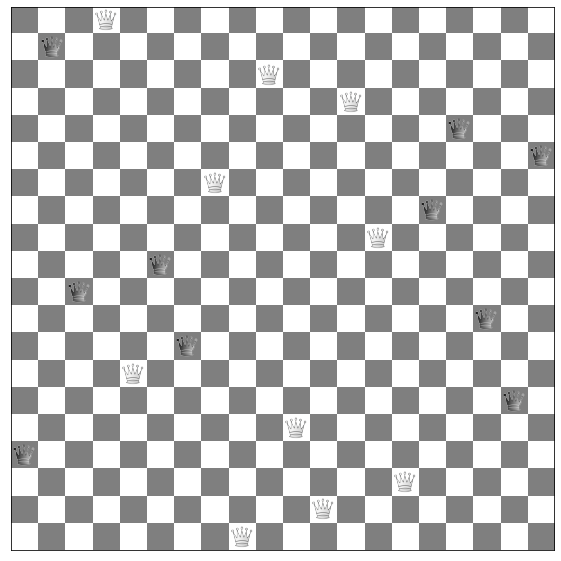

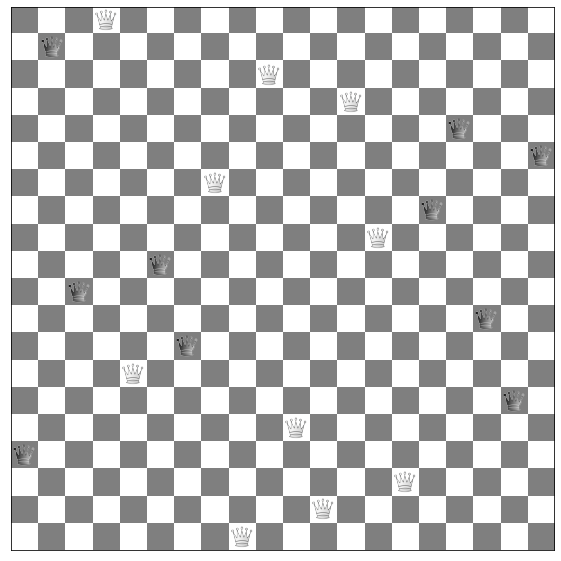

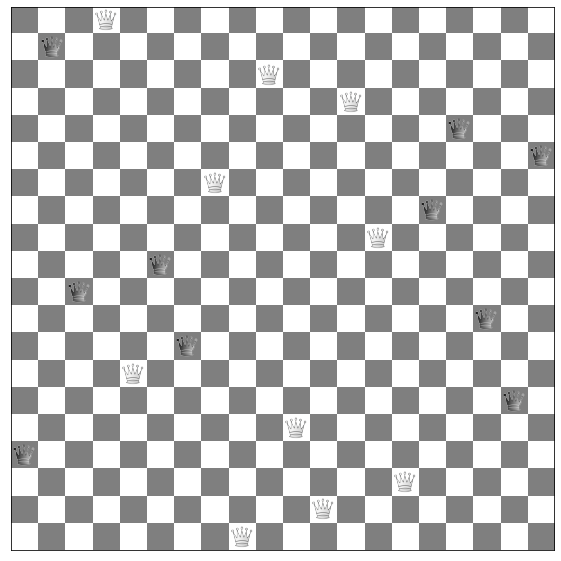

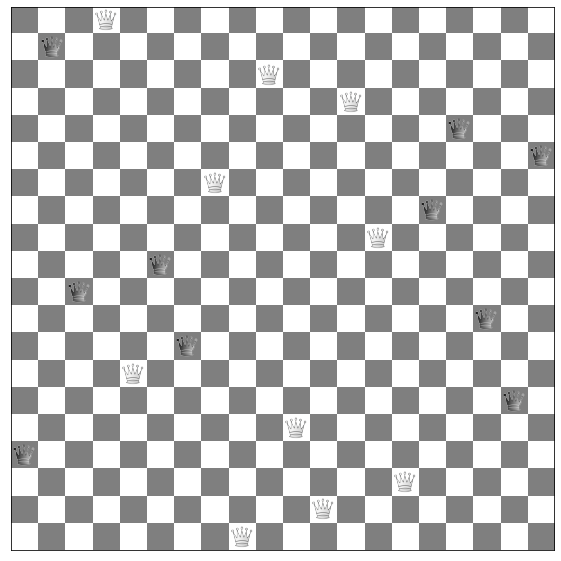

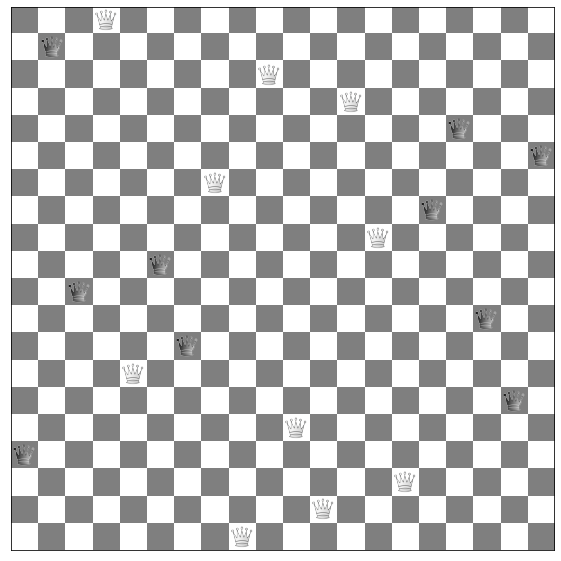

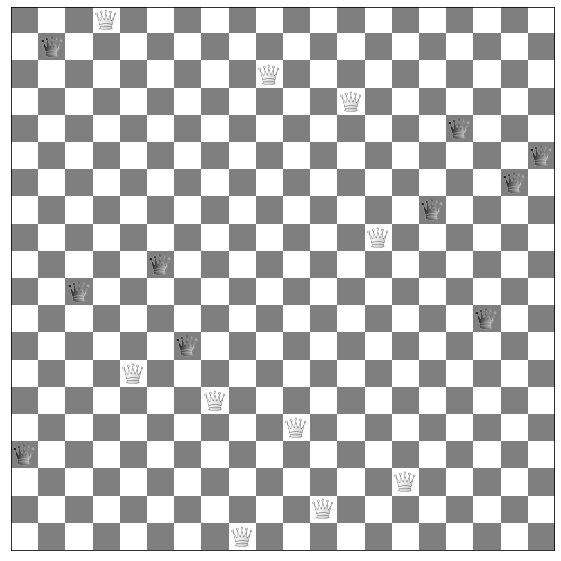

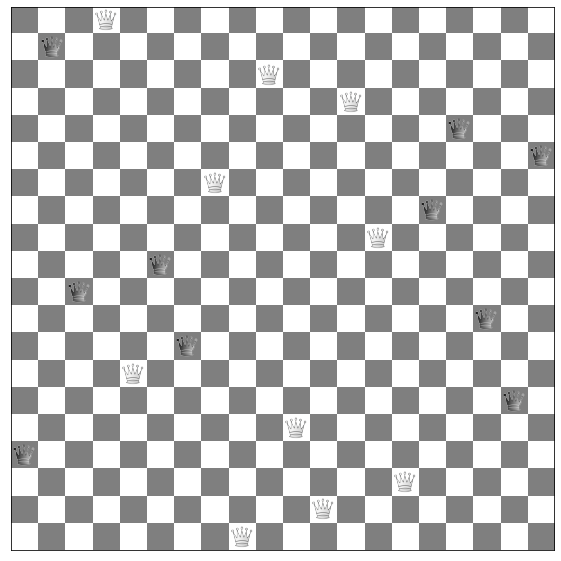

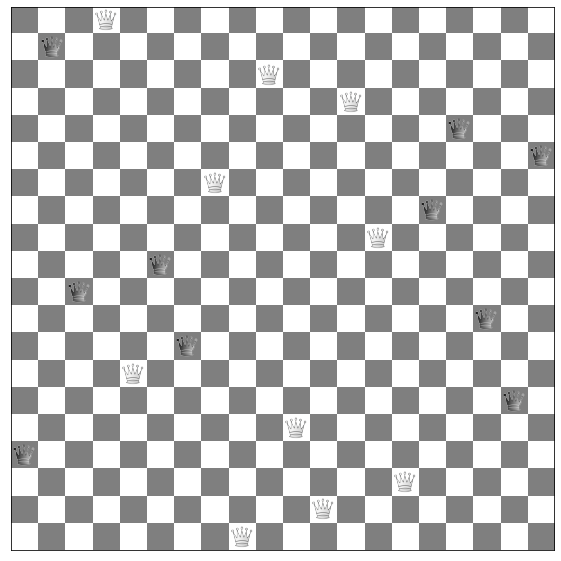

In [73]:
for i in range(len(solution_20)):
    display(solution_20[i])

### Experimento 3:

* N = 50
* População = 20
* Quantidade de Gerações Maxima = 1000
* Quantidade de cortes no crossover = 2

In [77]:
solution_50, solutions_50 = natural_selection(100,50,2,10**3)

Qualidade Geracao Primária: 32.79
Atual melhor solução: 30.973
Atual melhor solução: 29.667
Atual melhor solução: 28.612
Atual melhor solução: 28.462
Atual melhor solução: 28.188
Atual melhor solução: 27.300
Atual melhor solução: 25.869
Atual melhor solução: 25.442
Atual melhor solução: 25.412
Atual melhor solução: 25.350
Atual melhor solução: 24.626
Atual melhor solução: 24.146
Atual melhor solução: 24.033
Atual melhor solução: 23.451
Atual melhor solução: 23.035
Atual melhor solução: 22.787
Atual melhor solução: 22.385
Atual melhor solução: 21.816
Atual melhor solução: 21.227
Atual melhor solução: 20.886
Atual melhor solução: 20.865
Atual melhor solução: 20.832
Atual melhor solução: 19.623
Atual melhor solução: 19.079
Atual melhor solução: 18.812
Atual melhor solução: 18.782
Atual melhor solução: 18.191
Atual melhor solução: 17.617
Atual melhor solução: 17.407
Atual melhor solução: 17.210
Atual melhor solução: 16.750
Atual melhor solução: 16.508
Atual melhor solução: 15.816
Atual mel

In [78]:
best_fit_50 = []
for i in range(len(solution_50)):
    best_fit_50.append(fitness_nq(solution_50[i]))
    print("Qualidade da solução ", i, ":", best_fit_50[i])

Qualidade da solução  0 : 1.0
Qualidade da solução  1 : 2.0
Qualidade da solução  2 : 4.0
Qualidade da solução  3 : 1.0
Qualidade da solução  4 : 6.0
Qualidade da solução  5 : 4.0
Qualidade da solução  6 : 4.0
Qualidade da solução  7 : 4.0
Qualidade da solução  8 : 1.0
Qualidade da solução  9 : 4.0
Qualidade da solução  10 : 1.0
Qualidade da solução  11 : 3.0
Qualidade da solução  12 : 1.0
Qualidade da solução  13 : 1.0
Qualidade da solução  14 : 1.0
Qualidade da solução  15 : 4.0
Qualidade da solução  16 : 1.0
Qualidade da solução  17 : 4.0
Qualidade da solução  18 : 3.0
Qualidade da solução  19 : 1.0
Qualidade da solução  20 : 3.0
Qualidade da solução  21 : 1.0
Qualidade da solução  22 : 1.0
Qualidade da solução  23 : 3.0
Qualidade da solução  24 : 4.0
Qualidade da solução  25 : 1.0
Qualidade da solução  26 : 2.0
Qualidade da solução  27 : 4.0
Qualidade da solução  28 : 4.0
Qualidade da solução  29 : 4.0
Qualidade da solução  30 : 4.0
Qualidade da solução  31 : 1.0
Qualidade da soluç

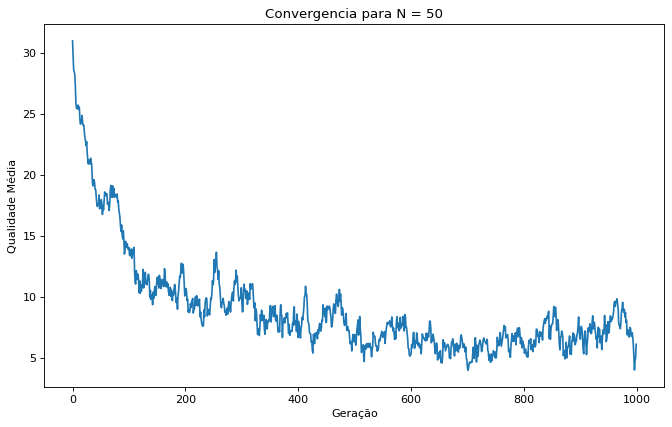

In [79]:
quality_solutions_50 = []
for i in range(0,len(solutions_50)):
    quality_solutions_50.append(evaluate(solutions_50[i]))

plt.figure(figsize=(10, 6), dpi=80)
plt.title('Convergencia para N = 50')
plt.xlabel('Geração')
plt.ylabel('Qualidade Média')
plt.plot(quality_solutions_50)
plt.show()

---

### 6. CONCLUSÃO:

A partir dos valores dos gráficos podemos concluir que a eficiencia do algoritmo é inversamente proporcional ao número de rainhas N, e para uma mesma quantidade de gerações menor a quantidades de solução ótimas encontradas, vale notar que na maneira que foi implementado neste trabalho nossa pespectiva foi de encontrar as melhores populações, e não apenas a melhor solução, o que aumenta o tempo de convergencia. Por fim podemos enxergar na prática como a inspiraçõ na natureza pode ser muita mais efetiva e prática do que algoritmos de força bruta tradicionais.
    
---

### 7. REFERENCIAS BIBLIOGRÁFICAS:

1. https://pt.wikipedia.org/wiki/Problema_das_oito_damas
2. Manual de Computação Evolutiva e Meta-heurística, 2013, Antônio Gaspar-Cunha, Ricardo Takahashi, Carlos Henggeler Antunes
    
---